## Markdown


In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set paths
ML_METRICS_PATH = "classification_metrics.json"
DL_METRICS_PATH = "dl_metrics.json"
TRANSFORMER_METRICS_PATH = "../bert-emotion/bert_metrics.json"

## Load Matrices

In [1]:
def load_json(path):
    if os.path.exists(path):
        with open(path, "r") as f:
            return json.load(f)
    else:
        print(f"❌ File not found: {path}")
        return {}

ml_metrics = load_json(ML_METRICS_PATH)
dl_metrics = load_json(DL_METRICS_PATH)
transformer_metrics = load_json(TRANSFORMER_METRICS_PATH)

print("ML Metrics:", ml_metrics)
print("DL Metrics:", dl_metrics)
print("Transformer Metrics:", transformer_metrics)

NameError: name 'ML_METRICS_PATH' is not defined

## Tables

In [ ]:
# Convert to comparison table

rows = []

# ML MODELS
for model_name, metrics in ml_metrics.items():
    rows.append({
        "Model": model_name,
        "Category": "ML",
        "Accuracy": metrics.get("accuracy"),
        "Precision": metrics.get("precision"),
        "Recall": metrics.get("recall"),
        "F1": metrics.get("f1"),
        "AUC": metrics.get("auc")
    })

# DL MODELS
for model_name, metrics in dl_metrics.items():
    rows.append({
        "Model": model_name,
        "Category": "DL",
        "Accuracy": metrics.get("accuracy"),
        "Precision": metrics.get("precision"),
        "Recall": metrics.get("recall"),
        "F1": metrics.get("f1"),
        "AUC": metrics.get("auc")
    })

# TRANSFORMER
rows.append({
    "Model": "BERT / DistilBERT",
    "Category": "Transformer",
    "Accuracy": transformer_metrics.get("accuracy"),
    "Precision": transformer_metrics.get("precision"),
    "Recall": transformer_metrics.get("recall"),
    "F1": transformer_metrics.get("f1"),
    "AUC": transformer_metrics.get("auc")
})

df = pd.DataFrame(rows)
df


,Model,Category,Accuracy,Precision,Recall,F1,AUC
0,LogisticRegression,ML,0.877939,0.877547,0.877939,0.874774,0.989759
1,RandomForest,ML,0.886943,0.886465,0.886943,0.886265,0.990499
2,FeedforwardNN,DL,0.845423,0.856352,0.845423,0.847490,0.968788
3,LSTM,DL,0.921461,0.923479,0.921461,0.922019,0.994326
4,BERT / DistilBERT,Transformer,NaN,NaN,NaN,NaN,NaN


## Save

In [ ]:
df.to_csv("metrics_summary.csv", index=False)
print("✔ Saved to results/metrics_summary.csv")

✔ Saved to results/metrics_summary.csv


## Plot comparison

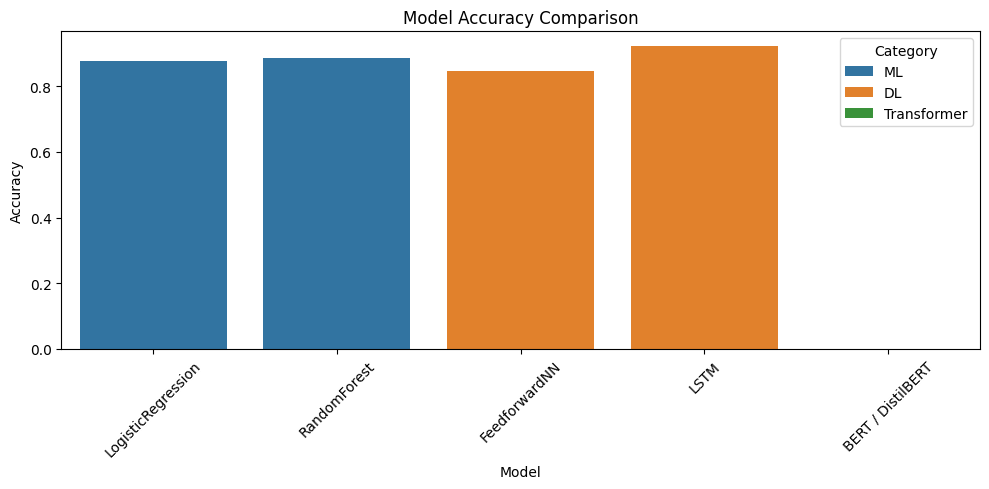

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Model", y="Accuracy", hue="Category")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("accuracy_comparison.png")
plt.show()


## F1 Score 

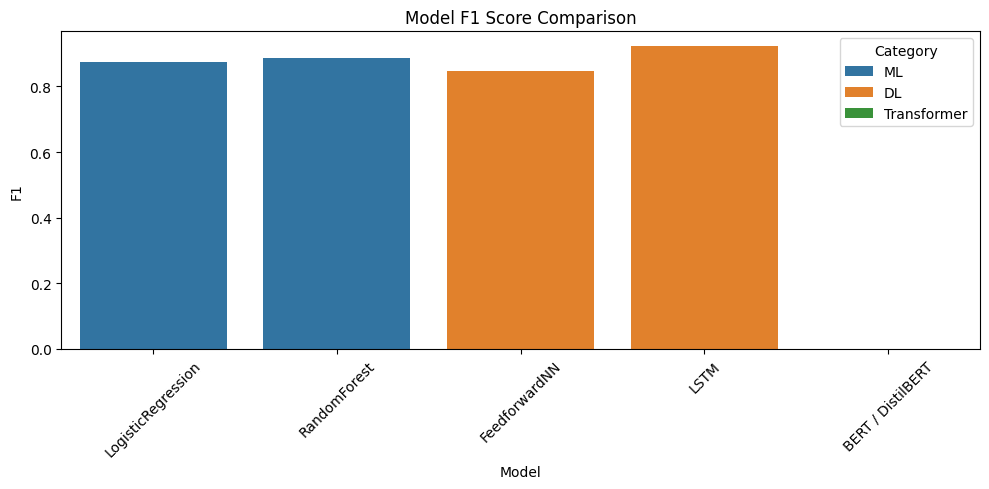

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Model", y="F1", hue="Category")
plt.title("Model F1 Score Comparison")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("f1_comparison.png")
plt.show()


## Summary

In [ ]:
best_model = df.sort_values("F1", ascending=False).iloc[0]

print("🔍 SUMMARY ANALYSIS")
print("----------------------------------")
print(f"Best Model      : {best_model['Model']}")
print(f"Category        : {best_model['Category']}")
print(f"Best F1 Score   : {best_model['F1']:.4f}")
print("----------------------------------")

if best_model['Category'] == "Transformer":
    print("Transformers clearly outperform ML and DL models due to contextual embeddings.")
elif best_model['Category'] == "DL":
    print("Deep Learning models beat ML models but fall short of Transformer performance.")
else:
    print("ML models perform well but lack deeper contextual understanding.")


🔍 SUMMARY ANALYSIS
----------------------------------
Best Model      : LSTM
Category        : DL
Best F1 Score   : 0.9220
----------------------------------
Deep Learning models beat ML models but fall short of Transformer performance.
